In [1]:
# without small fixes
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Features and target
features = [
    "like_weighted_sentiment", "cumulative_like_weighted_sentiment",
    "lag_1_registrations", "lag_2_registrations", "lag_3_registrations",
    "lag_1_sentiment", "lag_2_sentiment", "lag_3_sentiment",
    "month_num", "year", "time_index"
]
target = "registrations"

# Optional: Encode car model
df["Car Model"] = df["Car Model"].astype("category")

# Time-based split
train = df[df["year"] < 2024]
valid = df[df["year"] == 2024]

# Train LightGBM
train_set = lgb.Dataset(train[features], label=train[target], categorical_feature=["month_num", "year"])
valid_set = lgb.Dataset(valid[features], label=valid[target], reference=train_set)

params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt"
}

model = lgb.train(params, train_set, valid_sets=[valid_set], num_boost_round=1000, early_stopping_rounds=50)

NameError: name 'df' is not defined

In [7]:
# Imports
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import early_stopping, log_evaluation

# Load your dataset
df = pd.read_csv("ready_for_lightgbm_forecasting.csv")

# Encode Car Model as categorical (important for LightGBM)
df["Car Model"] = df["Car Model"].astype("category")

# Define the target variable
target = "registrations"

# Define features to be used for forecasting
features = [
    "lag_1_registrations", "lag_2_registrations", "lag_3_registrations",
    "lag_1_sentiment", "lag_2_sentiment", "lag_3_sentiment",
    "month_num", "year", "time_index", "Car Model"
]

# Drop rows with missing values in features or target (safe for time series with lags)
df = df.dropna(subset=features + [target])

# Time-based split: train on data before 2024, validate on 2024
train = df[df["year"] < 2024]
valid = df[df["year"] == 2024]

# Initialize LightGBM Regressor
model = LGBMRegressor(
    objective="regression",
    metric="rmse",
    boosting_type="gbdt",
    n_estimators=1000,
    random_state=42
)

# Fit the model with early stopping
model.fit(
    train[features], train[target],
    eval_set=[(valid[features], valid[target])],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=10)
    ],
    categorical_feature=["month_num", "year", "Car Model"]
)

# Predict on validation set
y_pred = model.predict(valid[features])

# Evaluate performance
rmse = mean_squared_error(valid[target], y_pred, squared=False)
print(f"Validation RMSE: {rmse:.2f}")
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = mean_squared_error(valid[target], y_pred, squared=False)
mae = mean_absolute_error(valid[target], y_pred)
mape = (abs((valid[target] - y_pred) / valid[target])).mean() * 100

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation MAPE: {mape:.2f}%")
from sklearn.metrics import r2_score

r2 = r2_score(valid[target], y_pred)
print(f"Validation R² Score: {r2:.4f}")


[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 412, number of used features: 10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 504.832524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [9]:
# without sentiment 
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import early_stopping, log_evaluation

# Load your dataset
df = pd.read_csv("ready_for_lightgbm_forecasting.csv")

# Encode Car Model as categorical (important for LightGBM)
df["Car Model"] = df["Car Model"].astype("category")

# Define the target variable
target = "registrations"

# Define features to be used for forecasting
features = [
    "lag_1_registrations", "lag_2_registrations", "lag_3_registrations",
    "month_num", "year", "time_index", "Car Model"
]

# Drop rows with missing values in features or target (safe for time series with lags)
df = df.dropna(subset=features + [target])

# Time-based split: train on data before 2024, validate on 2024
train = df[df["year"] < 2024]
valid = df[df["year"] == 2024]

# Initialize LightGBM Regressor
model = LGBMRegressor(
    objective="regression",
    metric="rmse",
    boosting_type="gbdt",
    n_estimators=1000,
    random_state=42
)

# Fit the model with early stopping
model.fit(
    train[features], train[target],
    eval_set=[(valid[features], valid[target])],
    callbacks=[
        early_stopping(stopping_rounds=50),
        log_evaluation(period=10)
    ],
    categorical_feature=["month_num", "year", "Car Model"]
)

# Predict on validation set
y_pred = model.predict(valid[features])

# Evaluate performance
rmse = mean_squared_error(valid[target], y_pred, squared=False)
print(f"Validation RMSE: {rmse:.2f}")
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions already made: y_pred
rmse = mean_squared_error(valid[target], y_pred, squared=False)
mae = mean_absolute_error(valid[target], y_pred)
mape = (abs((valid[target] - y_pred) / valid[target])).mean() * 100

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation MAPE: {mape:.2f}%")
r2 = r2_score(valid[target], y_pred)
print(f"Validation R² Score: {r2:.4f}")

[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 575
[LightGBM] [Info] Number of data points in the train set: 501, number of used features: 7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 502.469062
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


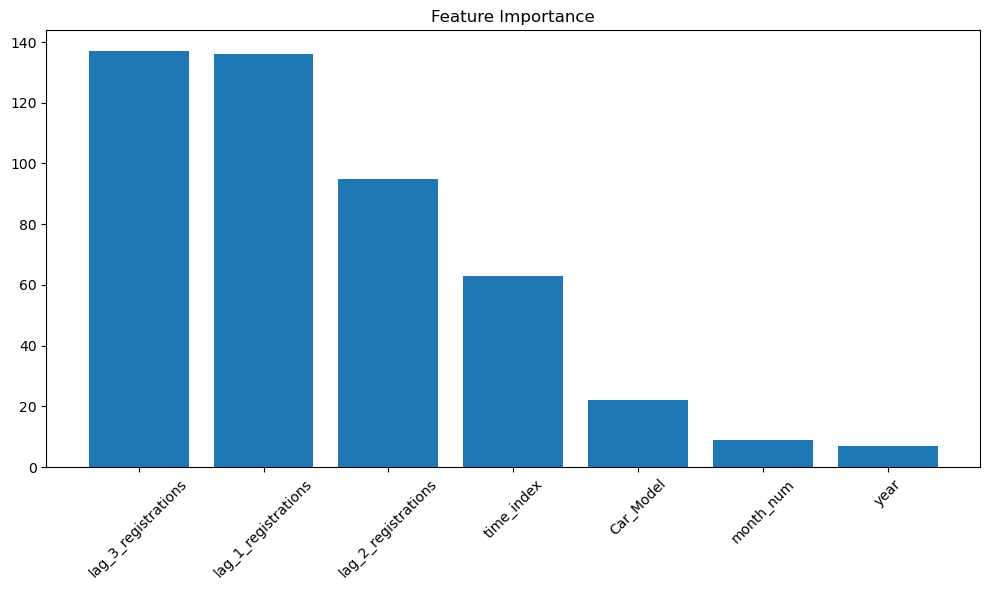

In [16]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
feature_names = model.feature_name_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#G gedaan try 3 
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Prepare Data ---
df = pd.read_csv('ready_for_lightgbm_forecasting.csv')

# Ensure data is sorted by Car Model and time_index for correct time-series splitting
# This is crucial for TimeSeriesSplit
df = df.sort_values(by=['Car Model', 'time_index']).reset_index(drop=True)

# Define features (X) and target (y)
# Exclude identifier columns and the target itself from features
# Based on your screenshot, 'registrations' is the target.
# 'month', 'year', 'num_year', 'time_index' can be used as features.
# 'Car Model' should be handled as a categorical feature.
target = 'registrations'
# Dynamically get feature columns, excluding target and purely identifier columns like 'month', 'year' if 'num_month', 'num_year' are used.
# Let's explicitly list them based on your screenshot
features = [
    'like_weighted_sentiment', 'cumulative_like_weighted_sentiment',
    'lag_1_registrations', 'lag_1_sentiment', 'lag_2_registrations',
    'lag_2_sentiment', 'lag_3_registrations', 'lag_3_sentiment',
    'month_num', # These seem like numerical representations of month/year
    # Include 'month' and 'year' if you want them as separate features (e.g., for categorical handling)
    'time_index', 'year' # Keeping these as they were in your screenshot and might be useful
]


# Add 'Car Model' to features and ensure it's treated as categorical
if 'Car Model' in df.columns and 'Car Model' not in features:
    features.append('Car Model')

X = df[features].copy() # Use .copy() to avoid SettingWithCopyWarning
y = df[target]

# Identify categorical features for LightGBM
categorical_features = []
if 'Car Model' in X.columns:
    categorical_features.append('Car Model')
    X['Car Model'] = X['Car Model'].astype('category')

# Add other potential categorical features like 'month', 'year' if desired
# For example, treating 'month' and 'year' as categorical can capture seasonal/annual effects
# without assuming linearity.
if 'month' in X.columns:
    categorical_features.append('month')
    X['month'] = X['month'].astype('category')
if 'year' in X.columns:
    categorical_features.append('year')
    X['year'] = X['year'].astype('category')


print(f"Features selected: {X.columns.tolist()}")
print(f"Target selected: {target}")
print(f"Categorical features identified: {categorical_features}")


# Handle NaN values introduced by lags for training/tuning
# LightGBM can handle NaNs, but for GridSearchCV with TimeSeriesSplit,
# it's often cleaner to ensure the training data for each fold doesn't have NaNs at its start.
# For simplicity and consistency in this setup, we'll drop rows where any feature is NaN.
# This assumes initial NaNs are at the very beginning of the time series and are not part of the
# data you intend to train/predict on for those early periods.
initial_rows_with_nan = X.isnull().any(axis=1).sum()
print(f"Number of rows with NaNs (likely due to lags): {initial_rows_with_nan}")

# We will perform the split first, then handle NaNs within the train/test folds if necessary,
# or simply drop them from the entire dataset if they appear only at the very beginning.
# For now, let's drop them for the tuning and final training steps.
# In a real scenario, you'd ensure your test set's lags are properly computed (e.g., using historical data).
X_clean = X.dropna()
y_clean = y.loc[X_clean.index] # Ensure y_clean matches the cleaned X_clean index

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape (after dropping NaNs): {X_clean.shape}")


# --- 2. Time Series Split ---
# n_splits determines the number of train/test folds
# A good starting point for time series validation.
tscv = TimeSeriesSplit(n_splits=3) # Adjust n_splits based on your data size and desired validation strategy

# --- 3. Hyperparameter Tuning (GridSearchCV Example) ---
# Define the parameter grid
param_grid = {
    'num_leaves': [20, 31, 40],
    'max_depth': [5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'colsample_bytree': [0.8, 1.0],
    'subsample': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Initialize LightGBM Regressor
lgb_estimator = lgb.LGBMRegressor(objective='regression_l1', # MAE objective
                                  metric='mae', # Metric to optimize for GridSearchCV
                                  random_state=42,
                                  n_jobs=-1)

# Setup GridSearchCV
print("\nStarting Hyperparameter Tuning...")
grid_search = GridSearchCV(
    estimator=lgb_estimator,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV. Pass categorical_feature explicitly if identified.
grid_search.fit(X_clean, y_clean,
                categorical_feature=categorical_features if categorical_features else 'auto')

print("\nHyperparameter Tuning Complete.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation MAE: {-grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# --- 4. Final Model Training and Evaluation on a held-out test set ---
# For proper evaluation, you should define a truly unseen test set from your original 'df'.
# This means splitting your original 'df' into train and test based on time *before* any processing.

# Let's use the last 6 months (arbitrary, adjust as needed) for the test set.
# This assumes your data has a sufficient length for such a split.
test_period_length = 6 # e.g., 6 months
# Ensure your time_index is a continuous numerical sequence to easily split.
max_time_index = df['time_index'].max()
train_df = df[df['time_index'] <= max_time_index - test_period_length].copy()
test_df = df[df['time_index'] > max_time_index - test_period_length].copy()

# Prepare features and target for the train and test sets
X_train_eval = train_df[features].copy()
y_train_eval = train_df[target].copy()

X_test_eval = test_df[features].copy()
y_test_eval = test_df[target].copy()

# Crucial: Handle NaNs in the training and testing sets.
# For training, drop them. For testing, you must ensure lags are properly filled
# or only predict where lags are available.
X_train_eval = X_train_eval.dropna()
y_train_eval = y_train_eval.loc[X_train_eval.index]

# For the test set, we only predict for rows where all features are available.
# This might mean your very first few test set rows (due to lags) won't have predictions.
X_test_eval = X_test_eval.dropna()
y_test_eval = y_test_eval.loc[X_test_eval.index]

# Ensure categorical features are correctly typed in evaluation sets
for col in categorical_features:
    if col in X_train_eval.columns:
        X_train_eval[col] = X_train_eval[col].astype('category')
    if col in X_test_eval.columns:
        X_test_eval[col] = X_test_eval[col].astype('category')


print(f"\nTraining data for final evaluation: {X_train_eval.shape}")
print(f"Testing data for final evaluation: {X_test_eval.shape}")

# Retrain the best model on the combined training data for the final evaluation
final_model = lgb.LGBMRegressor(**best_model.get_params(),
                                objective='regression_l1', # Use the best objective found/chosen
                                metric='mae', # Use the best metric found/chosen
                                random_state=42)

# Fit the final model
final_model.fit(X_train_eval, y_train_eval,
                categorical_feature=categorical_features if categorical_features else 'auto')


# Make predictions on the test set
y_pred = final_model.predict(X_test_eval)

# --- 5. Evaluation Metrics ---
print("\n--- Model Evaluation on Test Set ---")

mae = mean_absolute_error(y_test_eval, y_pred)
mse = mean_squared_error(y_test_eval, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_eval, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Mean Absolute Percentage Error (MAPE) - careful with zero actuals
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if np.sum(non_zero_mask) == 0:
        return np.nan
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

mape = mean_absolute_percentage_error(y_test_eval, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


# --- 6. Feature Importance ---
print("\n--- Feature Importance ---")
feature_importances = pd.DataFrame({
    'feature': X_train_eval.columns,
    'importance': final_model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15)) # Top 15 features
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()

# --- 7. Visualize Predictions ---
# Merge predictions back to the test_df for plotting
# Ensure 'time_index' is available for plotting
test_df_results = test_df.loc[X_test_eval.index].copy()
test_df_results['predicted_registrations'] = y_pred

plt.figure(figsize=(14, 7))
sns.lineplot(x='time_index', y='registrations', data=test_df_results, label='Actual Registrations', marker='o')
sns.lineplot(x='time_index', y='predicted_registrations', data=test_df_results, label='Predicted Registrations', marker='x')
plt.title('Actual vs. Predicted Registrations on Test Set')
plt.xlabel('Time Index')
plt.ylabel('Registrations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test_eval - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Registrations')
plt.ylabel('Residuals')
plt.show()

Features selected: ['like_weighted_sentiment', 'cumulative_like_weighted_sentiment', 'lag_1_registrations', 'lag_1_sentiment', 'lag_2_registrations', 'lag_2_sentiment', 'lag_3_registrations', 'lag_3_sentiment', 'month_num', 'time_index', 'year', 'Car Model']
Target selected: registrations
Categorical features identified: ['Car Model', 'year']
Number of rows with NaNs (likely due to lags): 238
Original data shape: (887, 14)
Cleaned data shape (after dropping NaNs): (649, 12)

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 163, number of used features: 12
[LightGBM] [Info] Start training from score 356.000000
